# Image Processing with MSRA10K Dataset
This notebook demonstrates basic image processing techniques using the MSRA10K dataset. We'll perform edge detection, region filling, and watershed segmentation on an image.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import canny
from skimage import morphology
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.color import label2rgb
import scipy.ndimage as nd
from skimage.io import imread
plt.rcParams["figure.figsize"] = (12, 8)
%matplotlib inline

## Step 1: Load an Image from the MSRA10K Dataset
Replace the file path with the correct path to an image from your downloaded MSRA10K dataset.

In [2]:
!wget http://mftp.mmcheng.net/Data/MSRA10K_Imgs_GT.zip

--2024-08-29 17:45:16--  http://mftp.mmcheng.net/Data/MSRA10K_Imgs_GT.zip
Resolving mftp.mmcheng.net (mftp.mmcheng.net)... 108.179.200.15
Connecting to mftp.mmcheng.net (mftp.mmcheng.net)|108.179.200.15|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://mftp.mmcheng.net/Data/MSRA10K_Imgs_GT.zip [following]
--2024-08-29 17:45:16--  https://mftp.mmcheng.net/Data/MSRA10K_Imgs_GT.zip
Connecting to mftp.mmcheng.net (mftp.mmcheng.net)|108.179.200.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205213299 (196M) [application/zip]
Saving to: ‘MSRA10K_Imgs_GT.zip’

MSRA10K_Imgs_GT.zip 100%[===================>] 195.71M  75.2MB/s    in 2.6s    

2024-08-29 17:45:19 (75.2 MB/s) - ‘MSRA10K_Imgs_GT.zip’ saved [205213299/205213299]



In [3]:
!unzip /content/MSRA10K_Imgs_GT.zip -d /content/MSRA10K_Imgs_GT/

Streaming output truncated to the last 5000 lines.
  inflating: /content/MSRA10K_Imgs_GT/MSRA10K_Imgs_GT/Imgs/45586.png  
  inflating: /content/MSRA10K_Imgs_GT/MSRA10K_Imgs_GT/Imgs/45595.jpg  
  inflating: /content/MSRA10K_Imgs_GT/MSRA10K_Imgs_GT/Imgs/45595.png  
  inflating: /content/MSRA10K_Imgs_GT/MSRA10K_Imgs_GT/Imgs/45607.jpg  
  inflating: /content/MSRA10K_Imgs_GT/MSRA10K_Imgs_GT/Imgs/45607.png  
  inflating: /content/MSRA10K_Imgs_GT/MSRA10K_Imgs_GT/Imgs/45691.jpg  
  inflating: /content/MSRA10K_Imgs_GT/MSRA10K_Imgs_GT/Imgs/45691.png  
  inflating: /content/MSRA10K_Imgs_GT/MSRA10K_Imgs_GT/Imgs/45762.jpg  
  inflating: /content/MSRA10K_Imgs_GT/MSRA10K_Imgs_GT/Imgs/45762.png  
  inflating: /content/MSRA10K_Imgs_GT/MSRA10K_Imgs_GT/Imgs/45765.jpg  
  inflating: /content/MSRA10K_Imgs_GT/MSRA10K_Imgs_GT/Imgs/45765.png  
  inflating: /content/MSRA10K_Imgs_GT/MSRA10K_Imgs_GT/Imgs/45771.jpg  
  inflating: /content/MSRA10K_Imgs_GT/MSRA10K_Imgs_GT/Imgs/45771.png  
  inflating: /content/MSRA

Text(0.5, 1.0, 'Original MSRA10K Image')

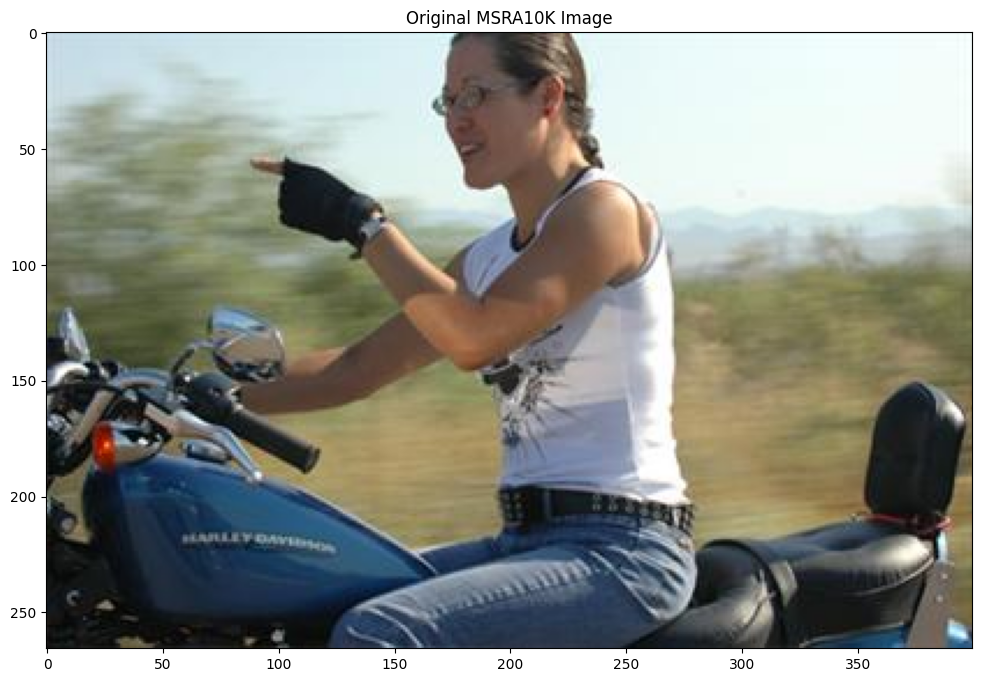

In [21]:
# Load the image (replace the path with your MSRA10K image path)
image_path = r'C:\Users\asus\Downloads\MSRA10K_Imgs_GT\MSRA10K_Imgs_GT\Imgs\182242.jpg'
msra_image = imread(image_path)
plt.imshow(msra_image)
plt.title('Original MSRA10K Image')

## Step 2: Convert to Grayscale
We'll convert the MSRA10K image to grayscale.

Text(0.5, 1.0, 'Grayscale Image')

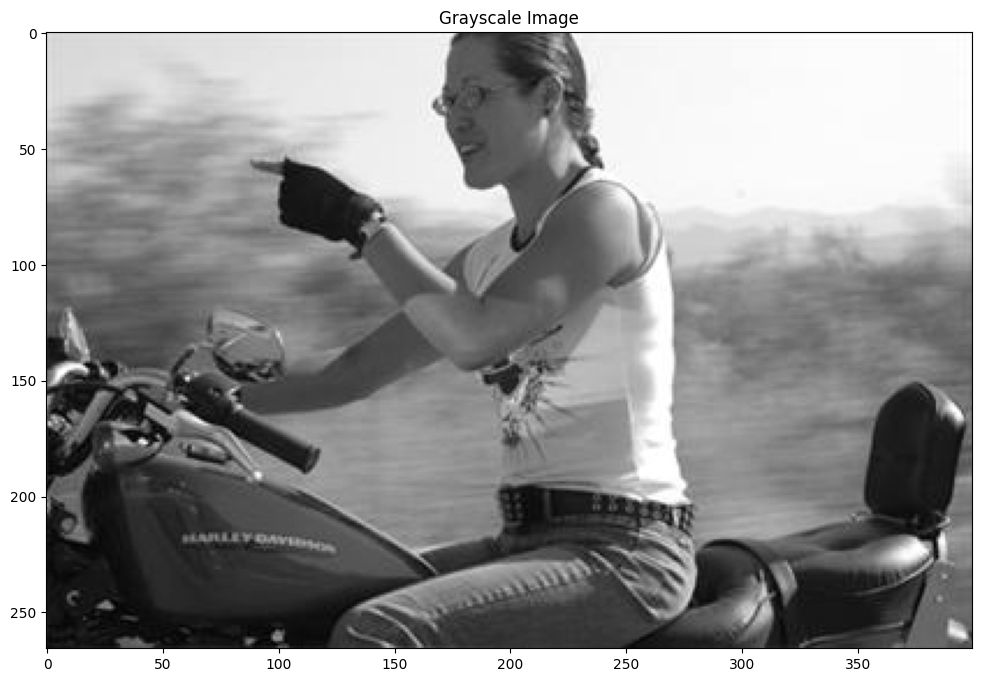

In [22]:
# Load the image and convert to grayscale
rocket_wh = rgb2gray(msra_image)
plt.imshow(rocket_wh, cmap='gray')
plt.title('Grayscale Image')

## Step 3: Apply Canny Edge Detection
Next, we'll use the Canny edge detection algorithm to detect the edges in the image.

Text(0.5, 1.0, 'Canny Edge Detection')

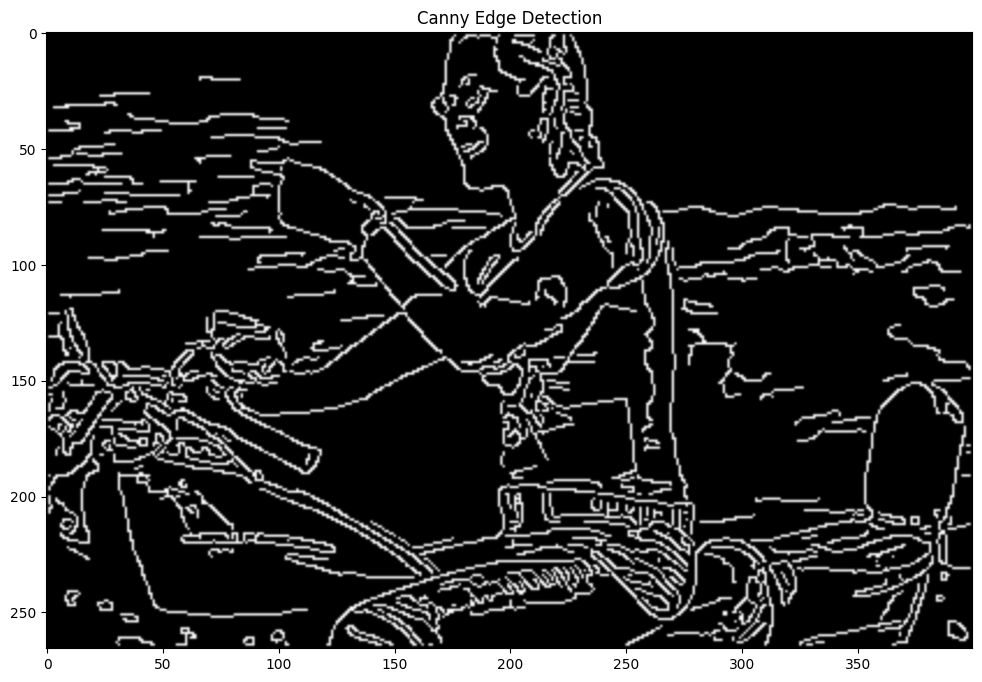

In [23]:
# Apply Canny edge detection
edges = canny(rocket_wh)
plt.imshow(edges, interpolation='gaussian', cmap='gray')
plt.title('Canny Edge Detection')

## Step 4: Fill Regions
We will fill the regions detected by the Canny edge detector.

Text(0.5, 1.0, 'Region Filling')

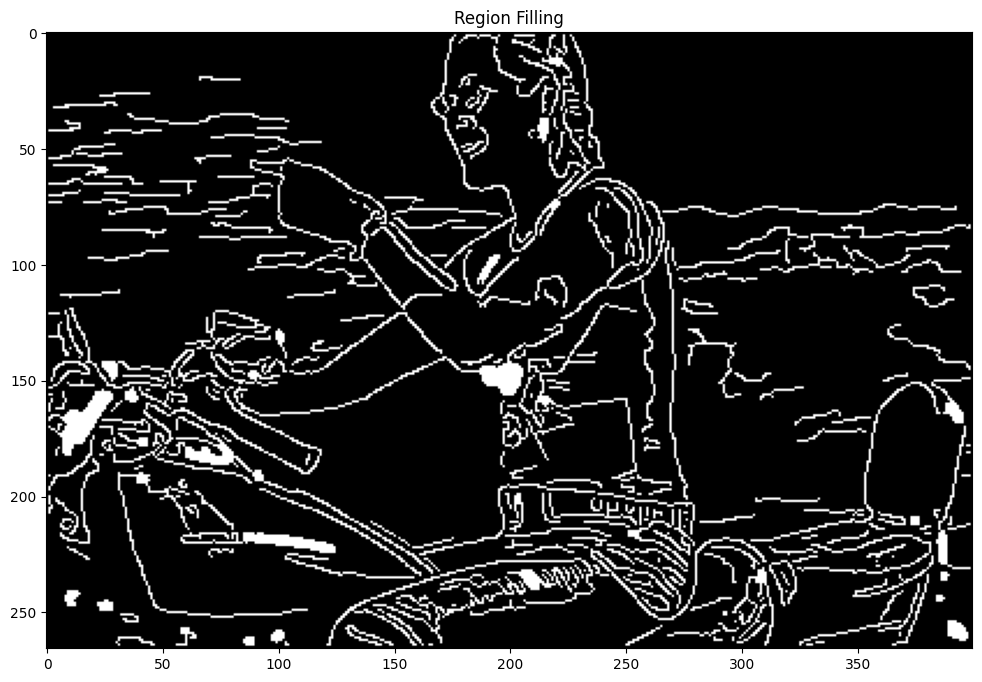

In [24]:
# Fill regions
fill_im = nd.binary_fill_holes(edges)
plt.imshow(fill_im, cmap='gray')
plt.title('Region Filling')

## Step 5: Create Elevation Map for Region Segmentation
Now we'll create an elevation map of the grayscale image to aid in region segmentation.

Text(0.5, 1.0, 'Elevation Map')

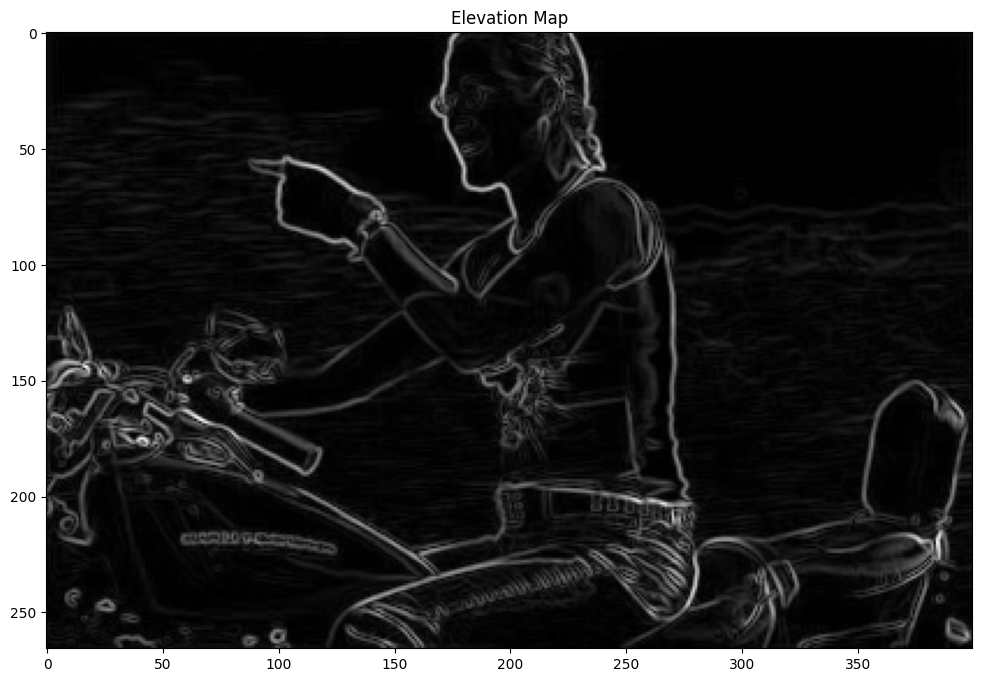

In [25]:
elevation_map = sobel(rocket_wh)
plt.imshow(elevation_map, cmap='gray')
plt.title('Elevation Map')

## Step 6: Apply Markers for Watershed Segmentation
We'll apply markers to the image and then use the Watershed algorithm for segmentation.

Text(0.5, 1.0, 'Markers')

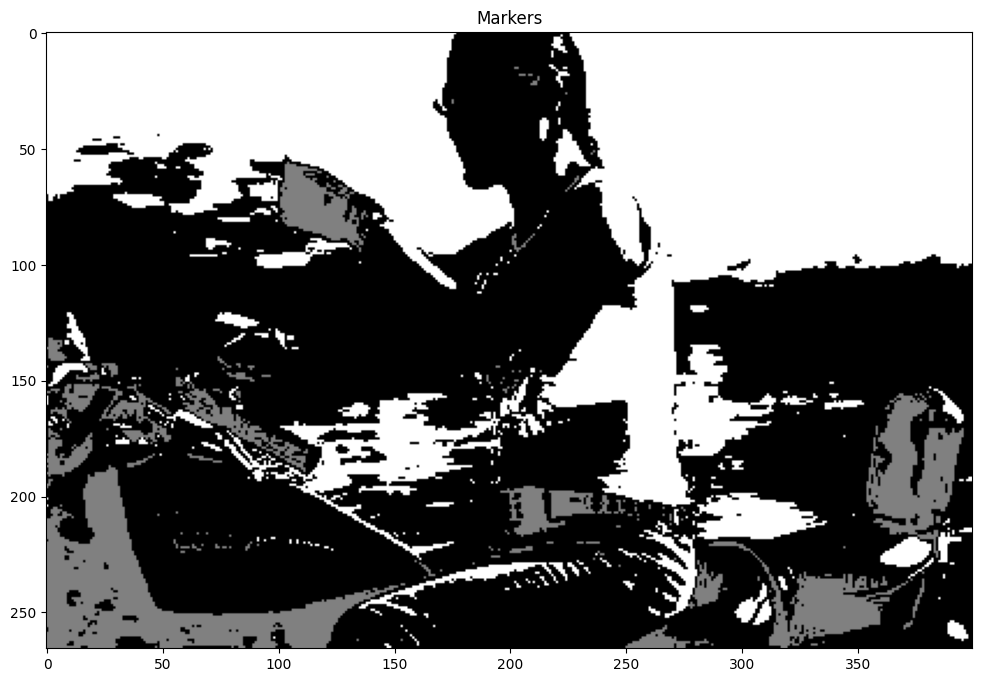

In [26]:
markers = np.zeros_like(rocket_wh)
markers[rocket_wh < 0.1171875] = 1  
markers[rocket_wh > 0.5859375] = 2  
plt.imshow(markers, cmap='gray')
plt.title('Markers')

## Step 7: Perform Watershed Segmentation
Now we'll perform the actual Watershed segmentation.

Text(0.5, 1.0, 'Watershed Segmentation')

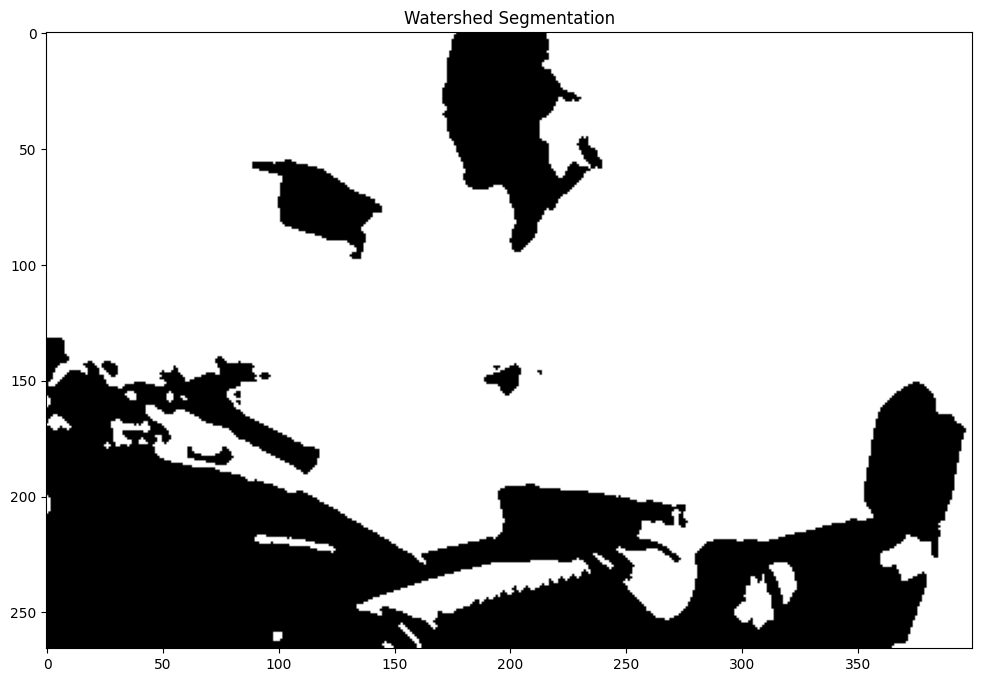

In [27]:
from skimage.segmentation import watershed

# Ensure markers is an integer array
markers = np.zeros_like(rocket_wh, dtype=np.int32)
markers[rocket_wh < 0.1171875] = 1  # 30/255
markers[rocket_wh > 0.5859375] = 2  # 150/255

# Perform watershed region segmentation
segmentation = watershed(elevation_map, markers)
plt.imshow(segmentation, cmap='gray')
plt.title('Watershed Segmentation')


## Step 8: Overlay and Contour Plotting
Finally, we'll overlay the segmented regions onto the original image and plot the contours.

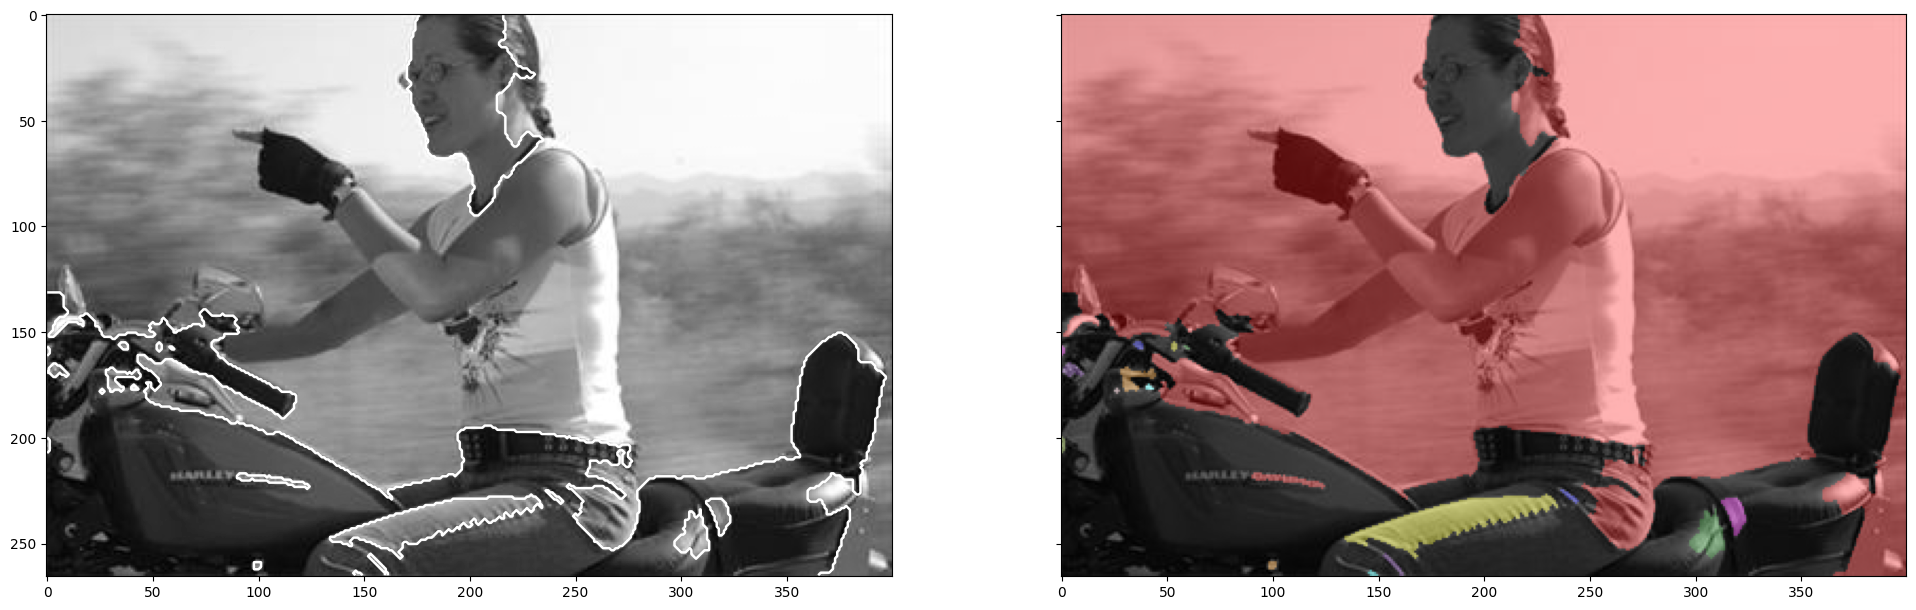

In [28]:
# Overlay and contour plotting
segmentation = nd.binary_fill_holes(segmentation - 1)
label_rock, _ = nd.label(segmentation)
image_label_overlay = label2rgb(label_rock, image=rocket_wh)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 16), sharey=True)
ax1.imshow(rocket_wh, cmap='gray')
ax1.contour(segmentation, [0.8], linewidths=1.8, colors='w')
ax2.imshow(image_label_overlay)
plt.show()

## Conclusion
In this notebook, we performed various image processing tasks on an MSRA10K image, including edge detection, region filling, and segmentation using the Watershed algorithm. These techniques are essential in computer vision tasks for identifying and analyzing different regions within an image.